## Importing Libraries

In [1]:
import csv
from textblob import TextBlob
import pandas
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

from sklearn.model_selection import train_test_split

import warnings


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\j25sr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\j25sr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\j25sr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Function to load the data

In [26]:
def load_data(path):
  messages = pandas.read_csv(path, sep='\t', quoting=csv.QUOTE_NONE,
                           names=["label", "message"])
  return messages

# Function to split into lemmas

In [27]:
def split_into_lemmas(message):
    message = message.lower()
    words = TextBlob(message).words
    return [word.lemmatize() for word in words]

# Function to split data into train, test and validation

In [28]:
def split_data(messages, random_state, ts = 0.2, v=0.2):
  v_a = v /(1-ts)
  msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=ts)
  msg_train, msg_val, label_train, label_val = train_test_split(
    msg_train, label_train, test_size=v_a, random_state=random_state)
  return msg_train, msg_val, msg_test, label_train, label_val, label_test


# Function to store the splitted and preprocessed data 

In [29]:
def to_csv(storagepath, msg_train, msg_val, msg_test, label_train, label_val, label_test):
  msg_train.to_csv(storagepath + 'msg_train.csv', index=False)
  msg_val.to_csv(storagepath + 'msg_val.csv', index=False)
  msg_test.to_csv(storagepath + 'msg_test.csv', index=False)
  label_train.to_csv(storagepath + 'label_train.csv', index=False)
  label_val.to_csv(storagepath + 'label_val.csv', index=False)
  label_test.to_csv(storagepath + 'label_test.csv', index=False)

# DVC

In [3]:
!dvc init --subdir

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [4]:
!dvc remote add myremote gdrive://1zvAgkeBtQfRqVs28fpVO4hkNY0zXt7R6

In [6]:
!dvc add raw_data.csv


To track the changes with git, run:

	git add raw_data.csv.dvc .gitignore

To enable auto staging, run:

	dvc config core.autostage true


⠋ Checking graph



In [8]:
!git add raw_data.csv.dvc .gitignore

In [11]:
!dvc remote default myremote

In [17]:
!dvc remote modify myremote gdrive_use_service_account true
!dvc remote modify myremote --local gdrive_service_account_json_file_path "C:\Users\j25sr\Downloads\amldvc-026588cc982d.json"

In [23]:
!dvc push

1 file pushed


## Initial Split

In [30]:
path = "C:/Users/j25sr/OneDrive/Desktop/AML 1/sms+spam+collection/SMSSpamCollection"

messages = load_data(path)

messages.message = messages.message.apply(split_into_lemmas)

In [31]:
msg_train, msg_val, msg_test, label_train, label_val, label_test = split_data(messages, random_state=10)

storage_path = 'C:/Users/j25sr/OneDrive/Desktop/Satyaki/Applied-Machine-Learning/Assignment_2/'
to_csv(storage_path, msg_train, msg_val, msg_test, label_train, label_val, label_test)

In [32]:
!dvc add msg_train.csv msg_val.csv msg_test.csv label_train.csv label_val.csv label_test.csv


To track the changes with git, run:

	git add label_train.csv.dvc msg_val.csv.dvc msg_test.csv.dvc label_val.csv.dvc label_test.csv.dvc .gitignore msg_train.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true


⠋ Checking graph



In [ ]:
!git add label_train.csv.dvc msg_val.csv.dvc msg_test.csv.dvc label_val.csv.dvc label_test.csv.dvc .gitignore msg_train.csv.dvc

In [34]:
!git commit -m "Version 1 split"

[main 298b159] Version 1 split
 11 files changed, 48 insertions(+)
 create mode 100644 Assignment_2/.dvc/.gitignore
 create mode 100644 Assignment_2/.dvc/config
 create mode 100644 Assignment_2/.dvcignore
 create mode 100644 Assignment_2/.gitignore
 create mode 100644 Assignment_2/label_test.csv.dvc
 create mode 100644 Assignment_2/label_train.csv.dvc
 create mode 100644 Assignment_2/label_val.csv.dvc
 create mode 100644 Assignment_2/msg_test.csv.dvc
 create mode 100644 Assignment_2/msg_train.csv.dvc
 create mode 100644 Assignment_2/msg_val.csv.dvc
 create mode 100644 Assignment_2/raw_data.csv.dvc


## 2nd split

In [36]:
msg_train, msg_val, msg_test, label_train, label_val, label_test = split_data(messages, random_state= 50)
storage_path = 'C:/Users/j25sr/OneDrive/Desktop/Satyaki/Applied-Machine-Learning/Assignment_2/'
to_csv(storage_path, msg_train, msg_val, msg_test, label_train, label_val, label_test)

In [37]:
!dvc add msg_train.csv msg_val.csv msg_test.csv label_train.csv label_val.csv label_test.csv


To track the changes with git, run:

	git add label_test.csv.dvc label_train.csv.dvc msg_val.csv.dvc msg_test.csv.dvc label_val.csv.dvc msg_train.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true


⠋ Checking graph



In [39]:
!git add label_test.csv.dvc label_train.csv.dvc msg_val.csv.dvc msg_test.csv.dvc label_val.csv.dvc msg_train.csv.dvc


In [40]:
!git commit -m "Version 2 split"

[main 388acdd] Version 2 split
 6 files changed, 12 insertions(+), 12 deletions(-)


## Accessing the splits

In [41]:
!git log

commit 388acddc692331d7eba70a740b52920cf5e92a6d
Author: SreejaChoudhury <j25sreeja@gmail.com>
Date:   Sun Mar 2 19:58:43 2025 +0530

    Version 2 split

commit 298b1594424075784a44d8a718eda5489c5b134c
Author: SreejaChoudhury <j25sreeja@gmail.com>
Date:   Sun Mar 2 19:56:50 2025 +0530

    Version 1 split

commit 58cc4b2ed3f2ddfb7f4f965bb56a52290a8b5627
Author: Satyaki Mullick <84702497+satyaki-02@users.noreply.github.com>
Date:   Thu Jan 30 22:05:17 2025 +0530

    Uploaded Assignment_1
    
    This folder contains two files: preprocess.ipynb and train.ipynb

commit 960c576f4565c7403b055585e5116e0ca95576f0
Author: Satyaki Mullick <84702497+satyaki-02@users.noreply.github.com>
Date:   Thu Jan 30 22:01:19 2025 +0530

    Delete

commit 64a344e7574c965c53485382d62e64670e94017e
Author: Satyaki Mullick <84702497+satyaki-02@users.noreply.github.com>
Date:   Thu Jan 30 19:24:47 2025 +0530

    Uploaded preprocess.ipynb
    
    A file that contains all the functions to preprocess the sms_sp

In [42]:
!git checkout 298b1594424075784a44d8a718eda5489c5b134c

M	Assignment_2/.dvc/config


Note: switching to '298b1594424075784a44d8a718eda5489c5b134c'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 298b159 Version 1 split


In [43]:
!dvc checkout

M       msg_val.csv
M       label_val.csv
M       msg_train.csv
M       label_test.csv
M       msg_test.csv
M       label_train.csv


In [45]:
import pandas as pd

train = pd.read_csv('label_train.csv')
test = pd.read_csv('label_test.csv')
val = pd.read_csv('label_val.csv')

Distribution of 1st split

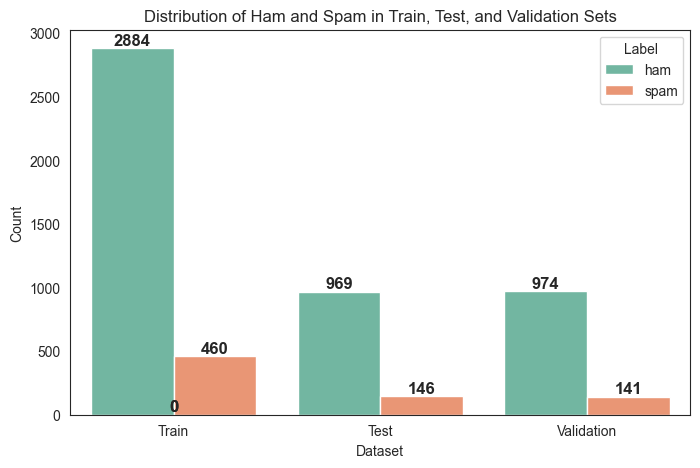

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

train['Dataset'] = 'Train'
test['Dataset'] = 'Test'
val['Dataset'] = 'Validation'

# Concatenate all datasets
df = pd.concat([train, test, val])

sns.set_style("white")

# Create the count plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Dataset', hue='label', palette='Set2')

# Add values on top of bars
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())), 
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center', va='bottom', fontsize=12, fontweight='bold'
    )

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Distribution of Ham and Spam in Train, Test, and Validation Sets')
plt.legend(title='Label')

# Show the plot
plt.show()

## Accessing 2nd split

In [50]:
!git checkout 388acddc692331d7eba70a740b52920cf5e92a6d

M	Assignment_2/.dvc/config


Previous HEAD position was 298b159 Version 1 split
HEAD is now at 388acdd Version 2 split


In [51]:
!dvc checkout

M       label_test.csv
M       msg_val.csv
M       label_train.csv
M       msg_train.csv
M       msg_test.csv
M       label_val.csv


In [52]:

train = pd.read_csv('label_train.csv')
test = pd.read_csv('label_test.csv')
val = pd.read_csv('label_val.csv')

Distribution of 2nd split

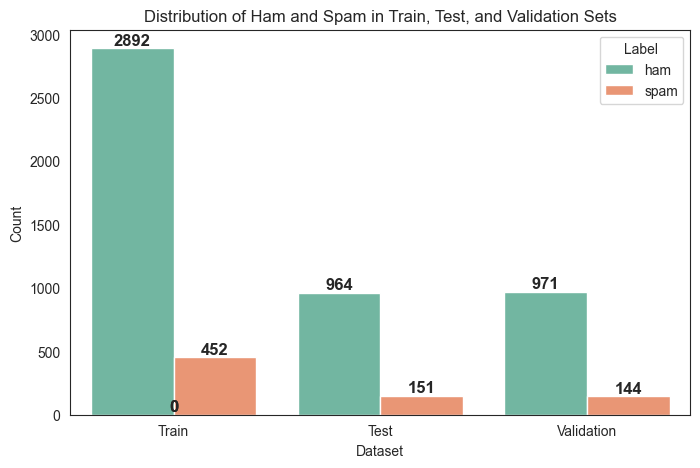

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

train['Dataset'] = 'Train'
test['Dataset'] = 'Test'
val['Dataset'] = 'Validation'

# Concatenate all datasets
df = pd.concat([train, test, val])

sns.set_style("white")

# Create the count plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Dataset', hue='label', palette='Set2')

# Add values on top of bars
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())), 
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center', va='bottom', fontsize=12, fontweight='bold'
    )

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Distribution of Ham and Spam in Train, Test, and Validation Sets')
plt.legend(title='Label')

# Show the plot
plt.show()

In [54]:
!git checkout main

M	Assignment_2/.dvc/config
Your branch is ahead of 'origin/main' by 2 commits.
  (use "git push" to publish your local commits)


Switched to branch 'main'


In [55]:
!dvc push

6 files pushed
